# Initialise 

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
import c14
from c14 import livermodels as lm



In [3]:
data = pd.read_csv('./results/C14data_liver_samples_20190502.csv')
c14_patient_data = data.groupby(['type', 'sample', 'ploidy', 'pathology']).mean().dropna(how='all').reset_index()
c14_patient_data['age'] = c14_patient_data.Dcoll - c14_patient_data.Dbirth 
c14_patient_data['e14C'] = c14_patient_data.error_measurement
data = c14_patient_data.query('type == "hepatocyte"')
edata = c14.exp_data(data)

In [4]:
m  = lm.Pl40()
op = c14.optimize(model=m,data=edata,step_size=2)
vis= c14.visualisze(model=m,data=edata)


In [5]:
op.loglike_dict(dict(lambda2=-0.21))

96.86140445646029

In [6]:
m


Parameters are:
lambda2 = 0.6165950018614822

Implicit Parameters are:
delta2 = [0.5071863414703459, 0.4922250701320158, 0.3933265123391408, 0.2841025719567128, 0.23595347258859556]
delta4 = [0.5071863414703459, 0.4922250701320158, 0.3933265123391408, 0.2841025719567128, 0.23595347258859556]
p = [0.9130705649695555, 0.8967656881350543, 0.8133104601852418, 0.7228745638969643, 0.6839410423769271]
kappa = [0, 0, 0, 0, 0]
lambda4 = [0, 0, 0, 0, 0]

Variables are t=[0,25,50,75,100]:
n2
n4

Default parameters are:
lambda2 = 1

Default limit are:
lambda2 = (1e-06, 100)

Default errors are:
lambda2 = 0.5

In [8]:
m.limit['lambda2'] = (1e-99, 1e0)

In [9]:
m


Parameters are:
lambda2 = 0.6165950018614822

Implicit Parameters are:
delta2 = [0.5071863414703459, 0.4922250701320158, 0.3933265123391408, 0.2841025719567128, 0.23595347258859556]
delta4 = [0.5071863414703459, 0.4922250701320158, 0.3933265123391408, 0.2841025719567128, 0.23595347258859556]
p = [0.9130705649695555, 0.8967656881350543, 0.8133104601852418, 0.7228745638969643, 0.6839410423769271]
kappa = [0, 0, 0, 0, 0]
lambda4 = [0, 0, 0, 0, 0]

Variables are t=[0,25,50,75,100]:
n2
n4

Default parameters are:
lambda2 = 1

Default limit are:
lambda2 = (1e-99, 1.0)

Default errors are:
lambda2 = 0.5

# Fit

In [10]:
res = op.optimize_minuit(dict(lambda2=-0.21))

In [11]:
res

({'lambda2': -0.5096201055680916},
 {'lambda2': 0.047117438602269676},
 -105.0313661668794,
 True,
          lambda2
 lambda2      1.0,
          lambda2
 lambda2  0.00222)

In [12]:
fit_limit = {'lambda2': (-3, 0)}

In [23]:
%%time
res_M = op.optimize_minuit_multistart(n=100,processes=7, fit_limit=fit_limit)

[(-3, 0)]


/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/optimize.py:99: UserWarning: Value Error in ode int: p is outside range
  warnings.warn("Value Error in ode int: " + str(e), UserWarning)
/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/optimize.py:99: UserWarning: Value Error in ode int: p is outside range
  warnings.warn("Value Error in ode int: " + str(e), UserWarning)
/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/optimize.py:99: UserWarning: Value Error in ode int: p is outside range
  warnings.warn("Value Error in ode int: " + str(e), UserWarning)
/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/optimize.py:99: UserWarning: Value Error in ode int: p is outside range
  warnings.warn("Value Error in ode int: " + str(e), UserWarning)
/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/base.py:112: UserWarning: Parameter lambda2=14480.835022641895 is outside the limits (1e-99, 1.0)
  warnings.warn(wstr,UserWarning)
/home/fabrost/pksCloud/projects

CPU times: user 323 ms, sys: 57.2 ms, total: 380 ms
Wall time: 3min 37s


In [31]:
best_res = res_M.loc[res_M['fval'].idxmin()]

In [32]:
best_res

Pl40
p0         {'lambda2': -0.9473009204635292}
fval                               -105.031
values     {'lambda2': -0.5096187402634792}
errors     {'lambda2': 0.04711770968784729}
corr               lambda2
lambda2      1.0
cov                lambda2
lambda2  0.00222
valid                                  True
n                                        41
Name: 38, dtype: object

In [39]:
best_res['errors']

{'lambda2': 0.04711770968784729}

In [40]:
best_res['values']

{'lambda2': -0.5096187402634792}

In [41]:
10**(-0.5096187402634792+0.05)

0.34704137848454986

In [42]:
10**(-0.5096187402634792-0.05)

0.27566476554791375

# Visualise

In [33]:
m.set_parameters(best_res['values'])

True

In [34]:
m.nparas

1

In [35]:
op.loglike_dict(best_res['values'])

104.55832305209934

In [36]:
op.calc_aicc(best_res['values'])

-204.80085663051446

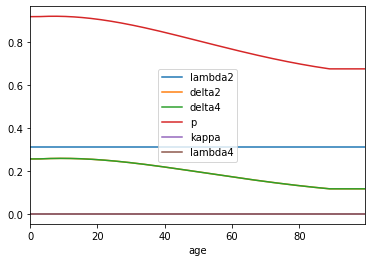

In [37]:
vis.plot_parameter()
plt.legend()
plt.show()

In [22]:
po = best_res['values']
m.set_parameters(po)
_ = vis.odeint()

In [ ]:
vis.plot_generic()

In [ ]:
vis.plot_simdata()

In [ ]:
#vis.plot_simdata_birth()

In [ ]:
l = vis.plot_parameter(log=True,nonlog=['p'])
plt.legend()

In [ ]:
vis.plot_parameter(log=True)
plt.legend()

In [ ]:
m